In [1]:
library(tidyverse)
library(plotly)
library(janitor)
library(arrow)
library(showtext)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: 'plotly'


The following object is masked from 'package:ggplot2':

    last_plot


The following object is masked from 'package:stats':

    filter


The following object is masked from 'package:graphics':

    layout



Attaching package: 'janitor'


The following objects are masked from 'package:stats':

    chisq.test, fisher.test



Attaching package: 'arrow'


The following object is masked from 'package:plotly':

    schema


The following object

In [2]:
sleep <- read_feather(r"{C:\Users\Christian\code_projects\health\apple_health_export\inferred_sleep.feather}")

Warning message:
"Removed 59 rows containing missing values or values outside the scale range
(`geom_line()`)."


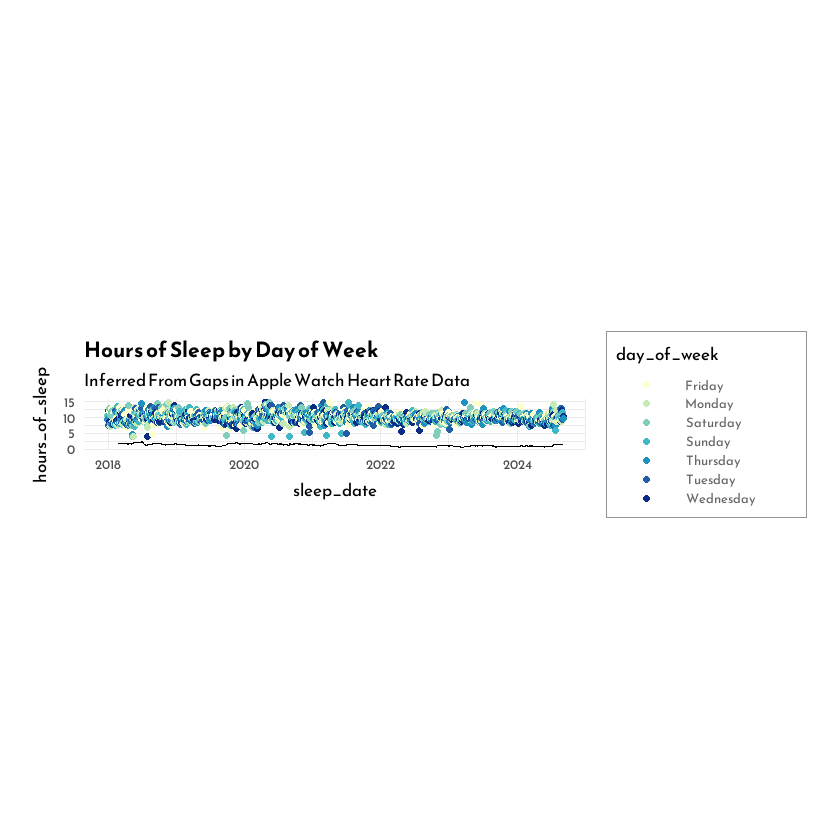

In [41]:
font_add_google('Reem Kufi')
theme_set(theme_minimal(base_family = "Reem Kufi", base_size = 12))
showtext_auto()
showtext_opts(dpi = 100)
fig <- ggplot(sleep, mapping = aes(x = sleep_date, y = hours_of_sleep)) +
geom_point(mapping = aes(color = day_of_week)) +
geom_line(mapping = aes(y = std_dev)) +
scale_color_brewer(palette = 'YlGnBu') + 
ggtitle(label = "Hours of Sleep by Day of Week", subtitle = 'Inferred From Gaps in Apple Watch Heart Rate Data') +
theme(
    plot.title = element_text(
    size = 15,
    face = "bold",
    #hjust = .5,
    #margin = margin(10, 0, 30, 0)
  ),
  plot.caption = element_text(
    size = 9,
    color = "#ffffff",
    #hjust = .5,
    #margin = margin(20, 0, 5, 0)
  ),
  plot.background = element_rect(fill = "#ffffff", color = NA),
  panel.background = element_rect(fill = NA, color = NA),
  panel.spacing.y = unit(0, "lines"),
  legend.position = "right",
  legend.text = element_text(size = 9, color = "grey40"),
  #legend.box.margin = margin(), 
  legend.background = element_rect(
    color = "#949494", 
    linewidth = .3, 
    fill = "#ffffff"
  ),
  legend.key.height = unit(.25, "lines"),
  legend.key.width = unit(2.5, "lines"),
  plot.margin = margin(rep(20, 4)),
  aspect.ratio = 1/10
    )

fig

In [42]:
showtext_opts(dpi = 300)
ggsave(fig, filename = "sleep.png", dpi = 600, device = 'png', width = 12, height = 4, units = 'in')

Warning message:
"Removed 59 rows containing missing values or values outside the scale range
(`geom_line()`)."


In [45]:
fig <- ggplot(sleep, mapping = aes(y = hours_of_sleep)) +
geom_histogram(mapping = aes(color = day_of_week)) 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


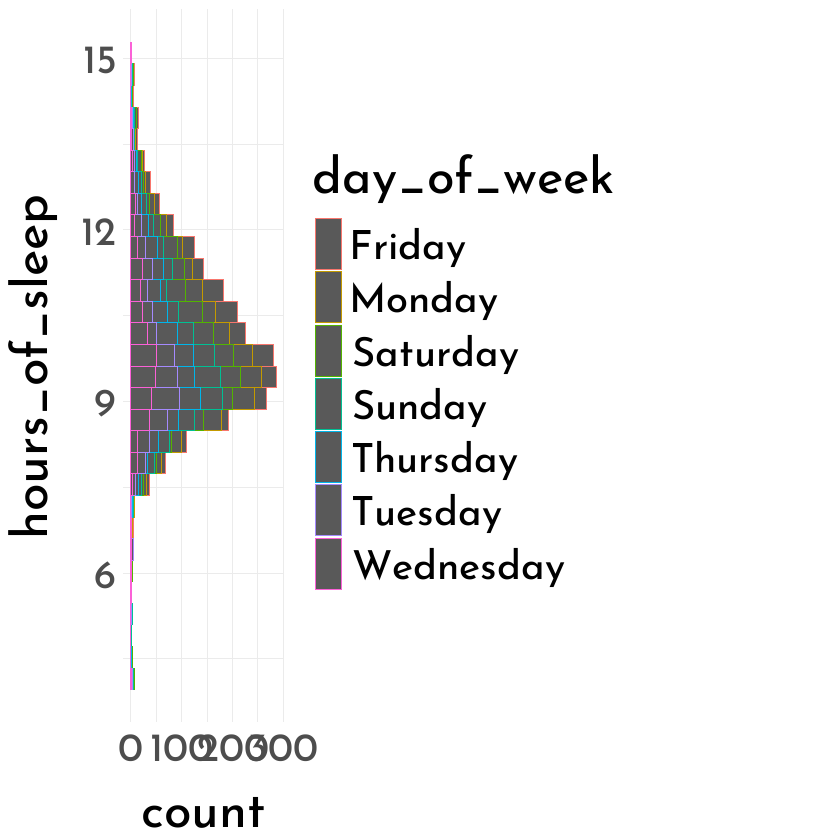

In [46]:
fig